In [48]:
print('a')

a


In [29]:
# !pip install sktime[all_extras]

In [1]:
import numba
import sktime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sktime.transformations.panel.rocket import Rocket
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sktime.datatypes._panel._convert import from_2d_array_to_nested

/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [2]:
# Load the dataset
data = pd.read_csv('../../00_Data_Input/relabelled_data_ksa_explore.csv')

# Preparing data for modeling
X = data[[f'VH_{i}' for i in range(31)]]
y = data['class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

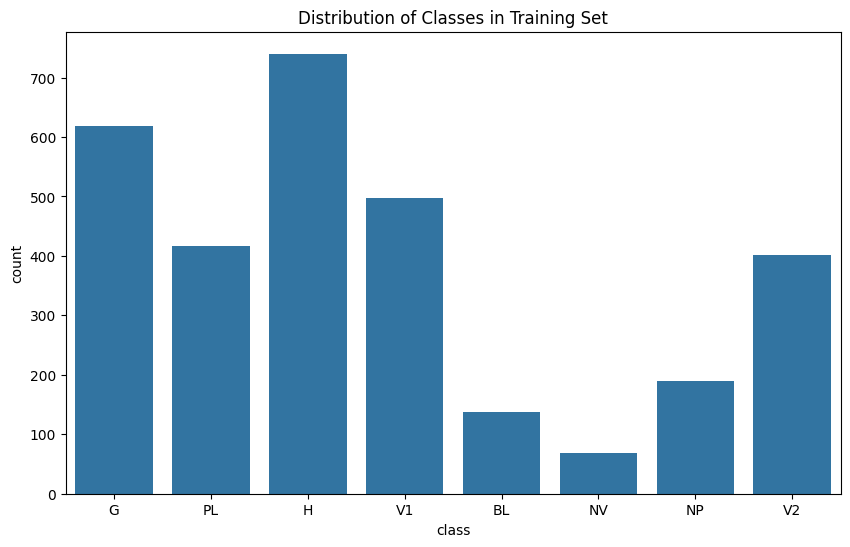

In [12]:
# Visualizing the distribution of the classes
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title("Distribution of Classes in Training Set")
plt.show()

In [14]:
# Convert the data to nested DataFrame format required by sktime
X_train_nested = from_2d_array_to_nested(X_train.to_numpy())
X_test_nested = from_2d_array_to_nested(X_test.to_numpy())

# Applying Rocket transformation
rocket = Rocket(num_kernels=10000)
X_train_transform = rocket.fit_transform(X_train_nested)
X_test_transform = rocket.transform(X_test_nested)

In [15]:
# Building a pipeline with RidgeClassifier
model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

In [ ]:
# Cross-validation
cv_scores = cross_val_score(model, X_train_transform, y_train, cv=5)
print(f"Mean CV Score: {cv_scores.mean()}")
print(f"CV Score Std Dev: {cv_scores.std()}")

/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=8.53306e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.04055e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.04303e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.07e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)

Mean CV Score: 0.4836974137976842
CV Score Std Dev: 0.008890921360539102


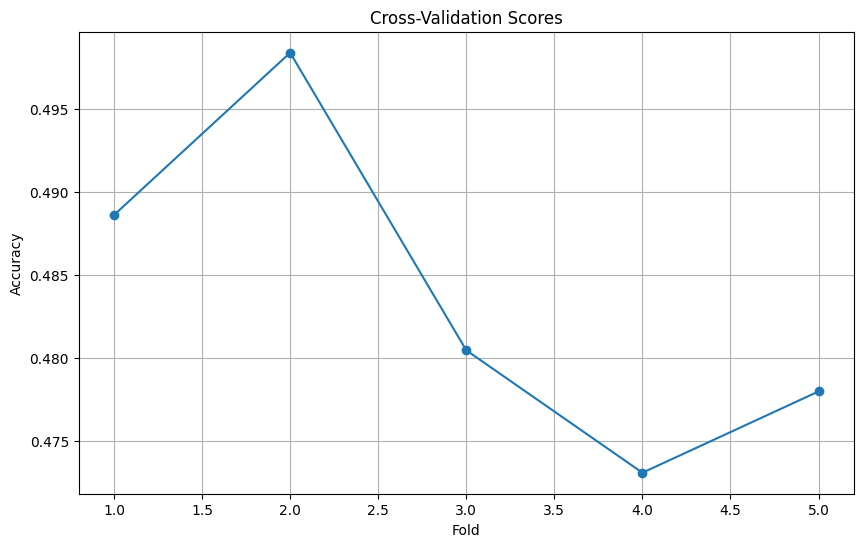

In [16]:
# 1. Visualizing Cross-Validation Scores
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cv_scores) + 1), cv_scores, marker='o')
plt.title("Cross-Validation Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [23]:
!pip install ujson

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.0 MB/s eta 0:00:00


In [34]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import ParameterGrid, cross_val_score
# from sklearn.pipeline import make_pipeline
# from sklearn.linear_model import RidgeClassifier
# from sktime.transformations.panel.rocket import Rocket
# from tqdm import tqdm

# # Define your parameter grid
# param_grid = {
#     'rocket__num_kernels': [5000, 10000],  # Number of kernels in ROCKET
#     'ridgeclassifier__alpha': [0.1, 1.0],  # Regularization strength
#     'ridgeclassifier__fit_intercept': [True, False],  # Whether to fit intercept
#     'ridgeclassifier__solver': ['auto', 'svd'],  # Solver to use in the optimization problem
# }

# # Create parameter combinations
# param_combinations = list(ParameterGrid(param_grid))

# # Progress bar with tqdm
# progress_bar = tqdm(total=len(param_combinations) * 4)  # 4 is the number of folds in cv

# best_score = -np.inf
# best_params = None

# # Loop through each combination of hyperparameters
# for params in param_combinations:
#     # Create the pipeline with the current set of parameters
#     pipeline = make_pipeline(Rocket(num_kernels=params['rocket__num_kernels']),
#                              RidgeClassifier(alpha=params['ridgeclassifier__alpha'],
#                                              fit_intercept=params['ridgeclassifier__fit_intercept'],
#                                              solver=params['ridgeclassifier__solver']))

#     # Perform cross-validation
#     scores = cross_val_score(pipeline, X_train_nested, y_train, cv=4, n_jobs=10)

#     # Update progress bar
#     progress_bar.update(4)  # Update by the number of folds

#     # Check if we have a new best score
#     if scores.mean() > best_score:
#         best_score = scores.mean()
#         best_params = params

# # Close the progress bar
# progress_bar.close()

# # Output the best parameters and the best score
# print("Best Parameters:", best_params)
# print("Best Cross-validation Score:", best_score)

In [36]:
# Hyperparameter tuning using extended GridSearchCV
param_grid = {
    'rocket__num_kernels': [5000, 10000],  # Number of kernels in ROCKET
    'ridgeclassifier__alpha': [0.1, 1.0],  # Regularization strength
    'ridgeclassifier__fit_intercept': [True, False],  # Whether to fit intercept
    'ridgeclassifier__solver': ['auto', 'svd'],  # Solver to use in the optimization problem
}

grid_search = GridSearchCV(make_pipeline(rocket, RidgeClassifier()), param_grid, cv=4, n_jobs=10, verbose=2)
grid_search.fit(X_train_nested, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=5.15017e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=6.597e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=5.07007e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=5.89964e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False

Best Parameters: {'ridgeclassifier__alpha': 0.1, 'ridgeclassifier__fit_intercept': True, 'ridgeclassifier__solver': 'svd', 'rocket__num_kernels': 10000}
Best Cross-validation Score: 0.4527379400260756


In [ ]:
# # Hyperparameter tuning using extended GridSearchCV
# param_grid = {
#     'rocket__num_kernels': [5000, 10000, 20000],  # Number of kernels in ROCKET
#     'ridgeclassifier__alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
#     'ridgeclassifier__fit_intercept': [True, False],  # Whether to fit intercept
#     'ridgeclassifier__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'],  # Solver to use in the optimization problem
# }

# grid_search = GridSearchCV(make_pipeline(rocket, RidgeClassifier()), param_grid, cv=5, n_jobs=10, verbose=2)
# grid_search.fit(X_train_nested, y_train)

# # Best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-validation Score:", grid_search.best_score_)

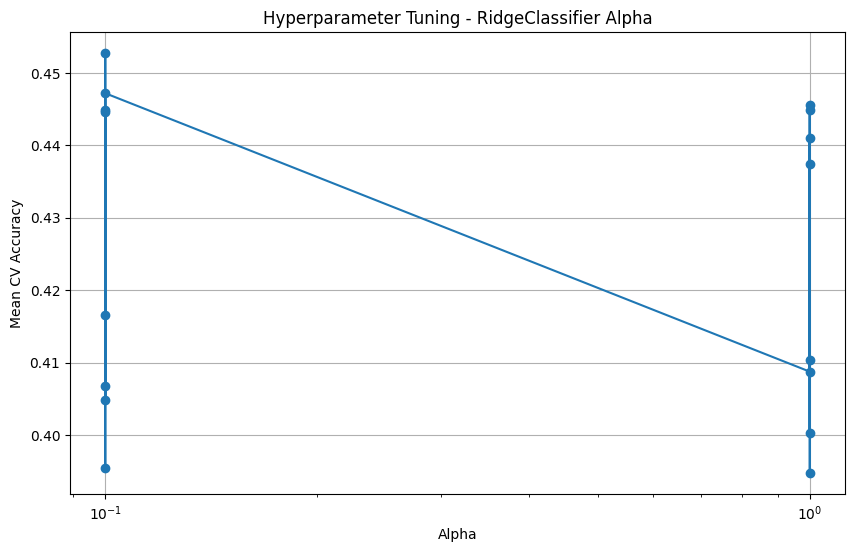

In [37]:
# 2. Visualizing Hyperparameter Tuning Results

# Extracting results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Plotting mean test scores for each alpha parameter
plt.figure(figsize=(10, 6))
plt.plot(results['param_ridgeclassifier__alpha'], results['mean_test_score'], marker='o')
plt.title("Hyperparameter Tuning - RidgeClassifier Alpha")
plt.xlabel("Alpha")
plt.ylabel("Mean CV Accuracy")
plt.xscale('log')
plt.grid(True)
plt.show()

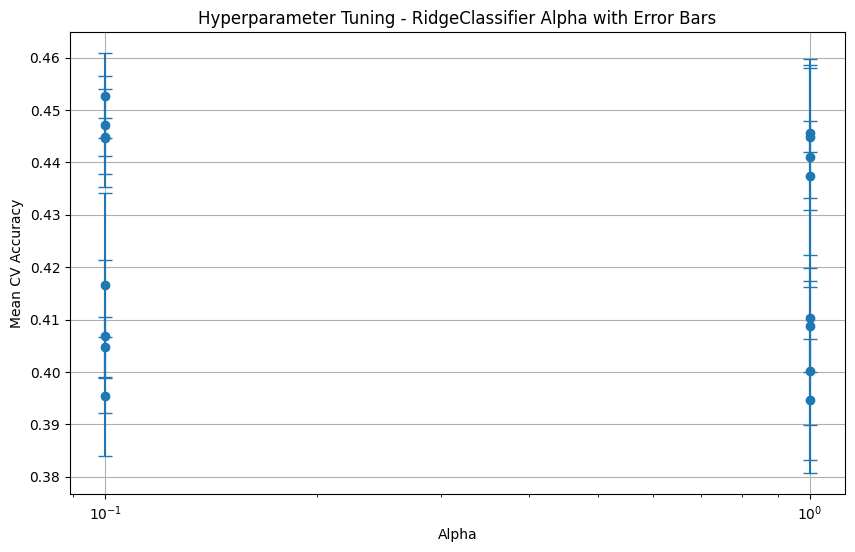

In [38]:
# If you want to visualize the full grid search results with std deviations
plt.figure(figsize=(10, 6))
plt.errorbar(results['param_ridgeclassifier__alpha'], 
             results['mean_test_score'], 
             yerr=results['std_test_score'], 
             fmt='o', capsize=5)
plt.title("Hyperparameter Tuning - RidgeClassifier Alpha with Error Bars")
plt.xlabel("Alpha")
plt.ylabel("Mean CV Accuracy")
plt.xscale('log')
plt.grid(True)
plt.show()

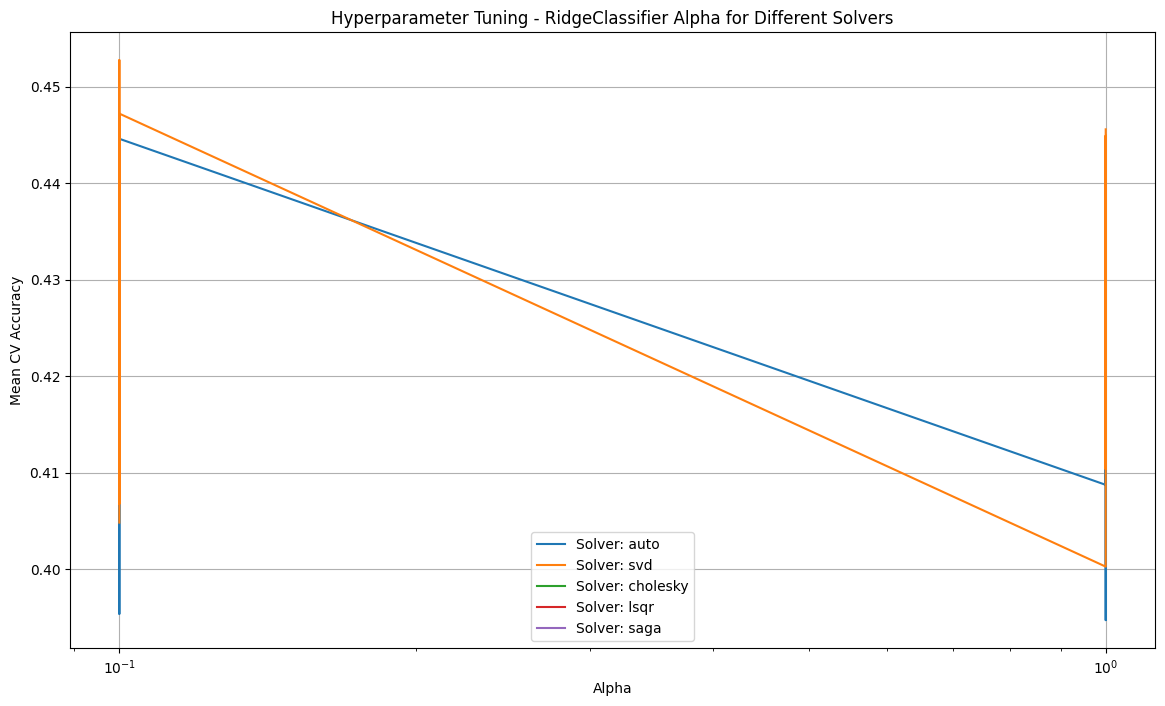

In [39]:
# Visualizing the impact of alpha and solver
plt.figure(figsize=(14, 8))
for solver in ['auto', 'svd', 'cholesky', 'lsqr', 'saga']:
    subset = results[results['param_ridgeclassifier__solver'] == solver]
    plt.plot(subset['param_ridgeclassifier__alpha'], subset['mean_test_score'], label=f'Solver: {solver}')
plt.title("Hyperparameter Tuning - RidgeClassifier Alpha for Different Solvers")
plt.xlabel("Alpha")
plt.ylabel("Mean CV Accuracy")
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

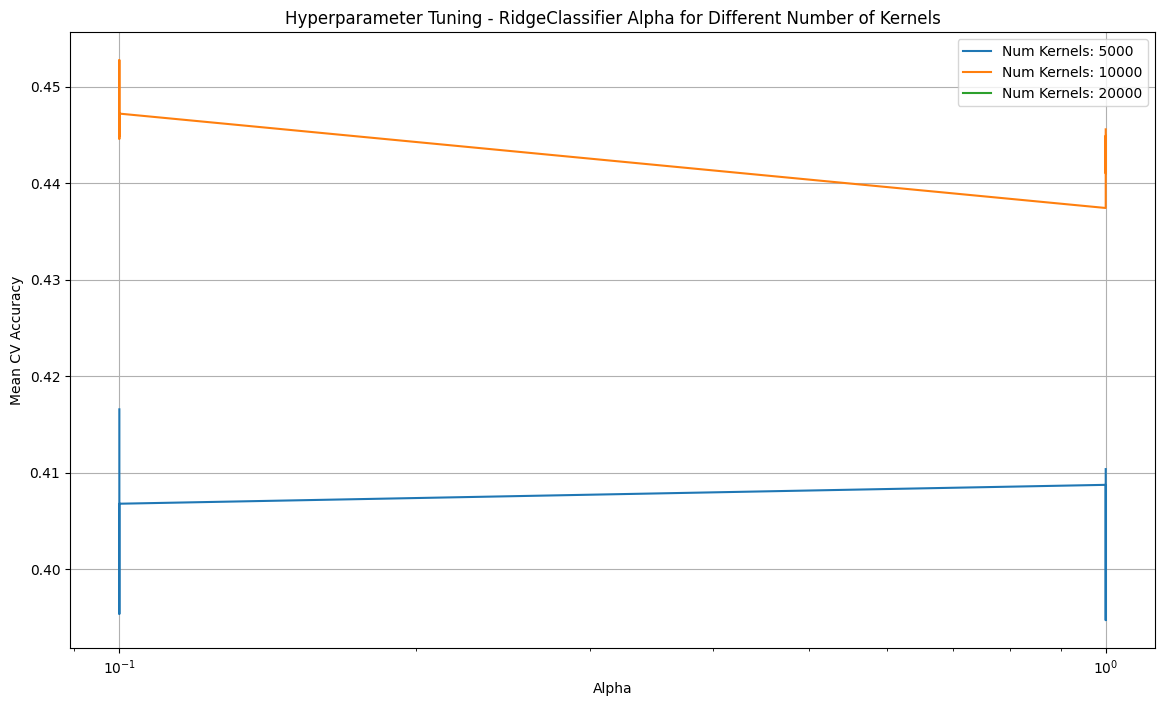

In [40]:
# Visualizing the impact of number of kernels
plt.figure(figsize=(14, 8))
for num_kernels in [5000, 10000, 20000]:
    subset = results[results['param_rocket__num_kernels'] == num_kernels]
    plt.plot(subset['param_ridgeclassifier__alpha'], subset['mean_test_score'], label=f'Num Kernels: {num_kernels}')
plt.title("Hyperparameter Tuning - RidgeClassifier Alpha for Different Number of Kernels")
plt.xlabel("Alpha")
plt.ylabel("Mean CV Accuracy")
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Evaluating the model on the test set
y_pred = grid_search.predict(X_test_transform)
y_prob = grid_search.predict_proba(X_test_transform) if hasattr(grid_search, "predict_proba") else None

In [43]:
# Classification report
print(classification_report(y_test, y_pred))

[CV] END ridgeclassifier__alpha=1.0, ridgeclassifier__fit_intercept=False, ridgeclassifier__solver=auto, rocket__num_kernels=10000; total time=  24.3s


ValueError: Found input variables with inconsistent numbers of samples: [767, 1]

[CV] END ridgeclassifier__alpha=1.0, ridgeclassifier__fit_intercept=False, ridgeclassifier__solver=auto, rocket__num_kernels=10000; total time=  24.3s
[CV] END ridgeclassifier__alpha=1.0, ridgeclassifier__fit_intercept=False, ridgeclassifier__solver=auto, rocket__num_kernels=10000; total time=  26.0s


In [44]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [767, 1]

[CV] END ridgeclassifier__alpha=0.1, ridgeclassifier__fit_intercept=True, ridgeclassifier__solver=svd, rocket__num_kernels=5000; total time= 1.1min
[CV] END ridgeclassifier__alpha=0.1, ridgeclassifier__fit_intercept=True, ridgeclassifier__solver=svd, rocket__num_kernels=5000; total time= 1.1min
[CV] END ridgeclassifier__alpha=0.1, ridgeclassifier__fit_intercept=True, ridgeclassifier__solver=svd, rocket__num_kernels=5000; total time= 1.1min
[CV] END ridgeclassifier__alpha=0.1, ridgeclassifier__fit_intercept=True, ridgeclassifier__solver=svd, rocket__num_kernels=5000; total time= 1.1min
[CV] END ridgeclassifier__alpha=1.0, ridgeclassifier__fit_intercept=True, ridgeclassifier__solver=svd, rocket__num_kernels=5000; total time= 1.1min
[CV] END ridgeclassifier__alpha=1.0, ridgeclassifier__fit_intercept=True, ridgeclassifier__solver=svd, rocket__num_kernels=5000; total time= 1.1min
[CV] END ridgeclassifier__alpha=0.1, ridgeclassifier__fit_intercept=False, ridgeclassifier__solver=svd, rocket__

In [ ]:
# If probabilities are available, display the first few
if y_prob is not None:
    print("Predicted Probabilities:")
    print(pd.DataFrame(y_prob, columns=grid_search.classes_).head())


[CV] END ridgeclassifier__alpha=0.1, ridgeclassifier__fit_intercept=True, ridgeclassifier__solver=auto, rocket__num_kernels=5000; total time=   9.1s
[CV] END ridgeclassifier__alpha=0.1, ridgeclassifier__fit_intercept=True, ridgeclassifier__solver=auto, rocket__num_kernels=5000; total time=   8.9s
[CV] END ridgeclassifier__alpha=0.1, ridgeclassifier__fit_intercept=True, ridgeclassifier__solver=auto, rocket__num_kernels=5000; total time=   9.1s
[CV] END ridgeclassifier__alpha=0.1, ridgeclassifier__fit_intercept=True, ridgeclassifier__solver=auto, rocket__num_kernels=5000; total time=  10.0s
[CV] END ridgeclassifier__alpha=0.1, ridgeclassifier__fit_intercept=False, ridgeclassifier__solver=auto, rocket__num_kernels=5000; total time=  10.3s
[CV] END ridgeclassifier__alpha=0.1, ridgeclassifier__fit_intercept=False, ridgeclassifier__solver=auto, rocket__num_kernels=5000; total time=  10.6s
[CV] END ridgeclassifier__alpha=0.1, ridgeclassifier__fit_intercept=False, ridgeclassifier__solver=auto,

In [47]:
y_pred

array(['G'], dtype='<U2')